# 프로젝트 : 나랑 닮은 연예인을 찾아보자

### Step1. 사진 모으기

In [70]:
import face_recognition
import os
from PIL import Image

In [71]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    pillow_image = Image.fromarray(cropped_face)
    save_path = os.getenv('HOME')+'/aiffel/face_embedding/pil'
    pillow_image.save(os.path.join(save_path, os.path.splitext(image_file)[0]+'.jpg'))
    
    return cropped_face

In [72]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [73]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb'
embedding_dict = get_face_embedding_dict(dir_path)

In [74]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('추신수1', '추신수2')

0.4702575675782909

### Step2. 얼굴 영역 자르기

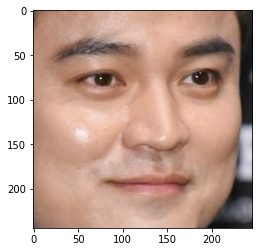

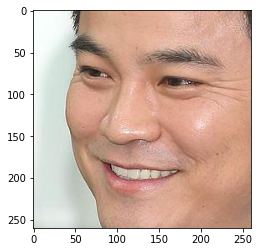

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

image_path = dir_path+'/추신수1.jpg'
cropped_face1 = get_cropped_face(image_path)
image_path = dir_path+'/추신수2.jpg'
cropped_face2 = get_cropped_face(image_path)

plt.figure()
plt.imshow(cropped_face1)
plt.figure()
plt.imshow(cropped_face2)

### Step3. 얼굴 영역의 임베딩 추출하기

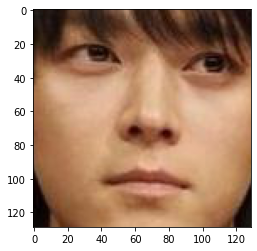

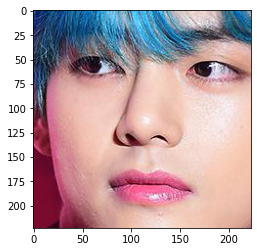

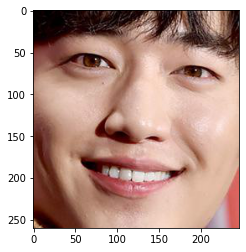

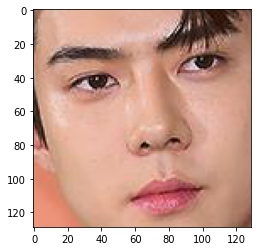

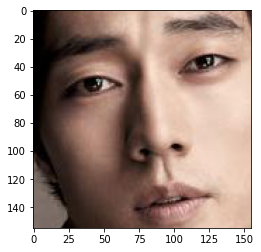

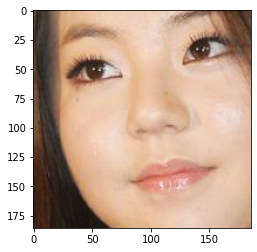

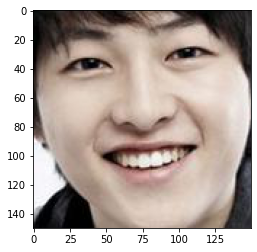

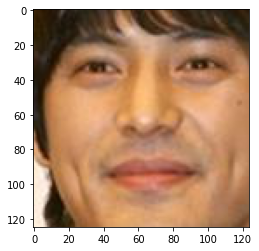

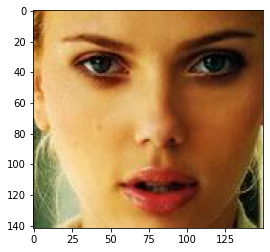

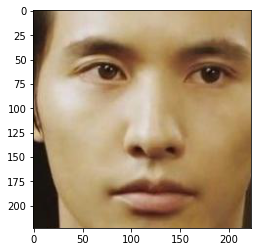

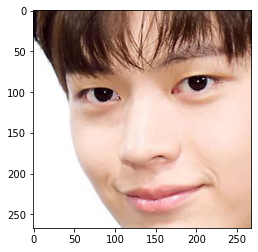

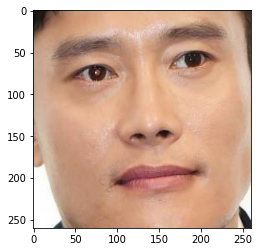

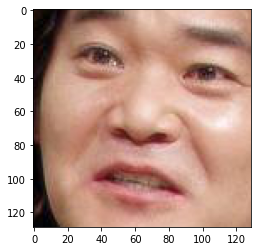

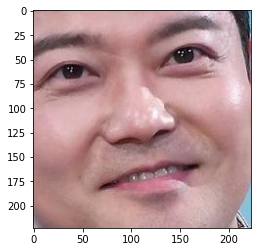

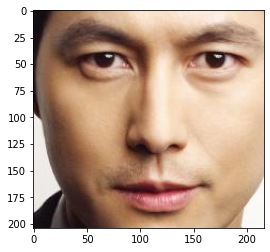

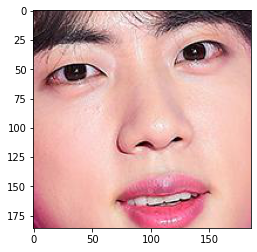

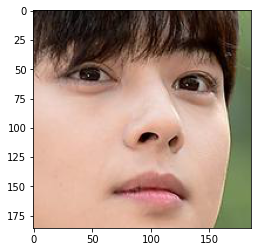

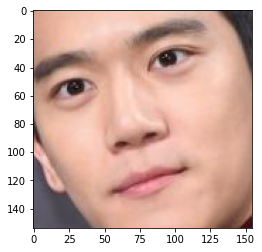

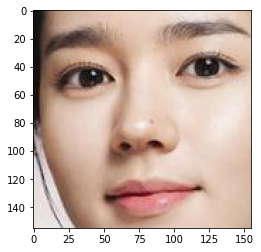

In [77]:
img_name = ['강동원', '뷔', '서강준', '세훈', '소지섭', '소희', '송중기', '오지호', '요한슨', '원빈', '육성재', '이병헌', '임대호', '전현무', '정우성', '진', '차은우', '하석진', '한가인']

for i in range(19):
    image_path = dir_path + '/' + img_name[i] + '.jpg'
    cropped_face = get_cropped_face(image_path)
    plt.figure()
    plt.imshow(cropped_face)

### Step4. 모은 연예인들과 비교하기

In [92]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i==0:
            continue
        if sorted_faces[i]:
            print('{}순위: {}({})'.format(i - 1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0]) ) )

In [93]:
get_nearest_face('추신수1')

0순위: 추신수2(0.4702575675782909)
1순위: 서강준(0.4848828732676163)
2순위: 뷔(0.5121825150235602)
3순위: 육성재(0.5209646475676466)
4순위: 하석진(0.5275629519711741)
5순위: 임대호(0.5408492973048519)


In [94]:
get_nearest_face('추신수2')

0순위: 추신수1(0.4702575675782909)
1순위: 임대호(0.5100194004597192)
2순위: 전현무(0.5647283075355257)
3순위: 육성재(0.5948162535550352)
4순위: 서강준(0.5960065205473214)
5순위: 하석진(0.6049044032315173)


### Step5. 다양한 재미있는 시각화 시도해 보기

In [105]:
import matplotlib.image as mpimg

folder_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb/'

### <종합 순위>

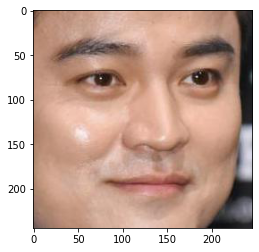

In [113]:
# 추신수1
image_path = folder_path+'추신수1.jpg'
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)

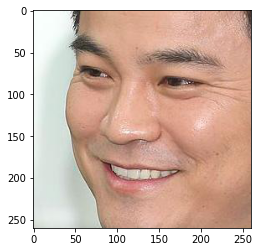

In [114]:
# 0순위: 추신수2(0.4702575675782909)
image_path = folder_path+'추신수2.jpg'
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)

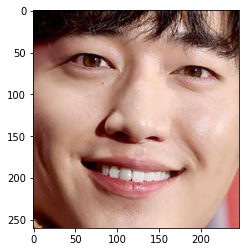

In [115]:
# 1순위: 서강준(0.4848828732676163)
image_path = folder_path+'서강준.jpg'
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)

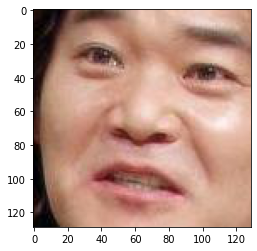

In [116]:
# 2순위: 임대호(0.5100194004597192)
image_path = folder_path+'임대호.jpg'
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)

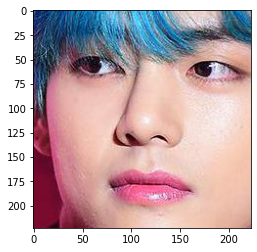

In [117]:
# 3순위: 뷔(0.5121825150235602)
image_path = folder_path+'뷔.jpg'
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)

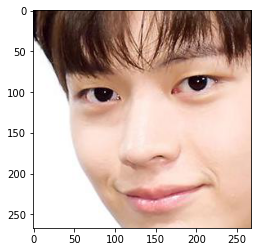

In [118]:
# 4순위: 육성재(0.5209646475676466)
image_path = folder_path+'육성재.jpg'
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)

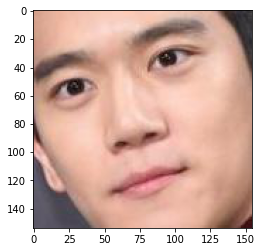

In [119]:
# 5순위: 하석진(0.5275629519711741)
image_path = folder_path+'하석진.jpg'
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)

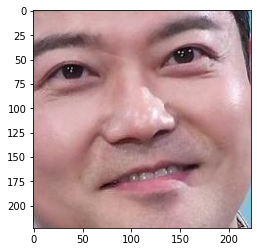

In [120]:
# 번외: 전현무(0.5647283075355257)
image_path = folder_path+'전현무.jpg'
img = mpimg.imread(image_path)
plt.figure()
plt.imshow(img)

### 여배우들은 위기를 모면하였지만, 추신수가 전현무보다 뷔를 더 닮았다니 정말 전 세계의 아미들이 통탄하지 아니할 수 없는 일이다.